In [ ]:
# --- Install necessary libraries if running on Google Colab for the first time ---
!pip install pandas numpy scikit-learn matplotlib seaborn umap-learn shap

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import shap

In [ ]:
# --- 1. Import the CSV files ---

from google.colab import files
uploaded = files.upload()

cerebellum_df = pd.read_csv('cerebellum_DP.csv')
hippocampus_df = pd.read_csv('Hippocampus_DP.csv')
thalamus_df = pd.read_csv('Thallamus_DP.csv')
dpfc_df = pd.read_csv('DPFC_DP.csv')

# Drop the 'AdjustedPvalue' column as requested
cerebellum_df = cerebellum_df.drop('AdjustedPvalue', axis=1, errors='ignore')
hippocampus_df = hippocampus_df.drop('AdjustedPvalue', axis=1, errors='ignore')
thalamus_df = thalamus_df.drop('AdjustedPvalue', axis=1, errors='ignore')
dpfc_df = dpfc_df.drop('AdjustedPvalue', axis=1, errors='ignore')

# Display the first few rows of each DataFrame to verify import
print("\n--- Cerebellum Data ---")
print(cerebellum_df.head())
print("\n--- Hippocampus Data ---")
print(hippocampus_df.head())
print("\n--- Thalamus Data ---")
print(thalamus_df.head())
print("\n--- DPFC Data ---")
print(dpfc_df.head())

Saving Thallamus_DP.csv to Thallamus_DP.csv
Saving cerebellum_DP.csv to cerebellum_DP.csv
Saving DPFC_DP.csv to DPFC_DP.csv
Saving Hippocampus_DP.csv to Hippocampus_DP.csv

--- Cerebellum Data ---
   Accession     Gene    22week_Avg    26week_Avg     1year_Avg     2year_Avg  \
0  194595509   SPTAN1  3.403840e+07  3.919413e+07  9.294157e+07  8.739405e+07   
1  306966132   SPTAN1  4.195606e+04  3.812966e+04  5.112267e+04  4.313739e+04   
2  112382250   SPTBN1  2.644566e+07  2.713649e+07  5.056949e+07  5.641060e+07   
3   41322908     PLEC  1.892782e+07  2.540079e+07  1.675443e+07  2.700018e+07   
4   33350932  DYNC1H1  3.015181e+07  2.807374e+07  2.422420e+07  2.308685e+07   

      4year_Avg    22year_Avg    35year_Avg    47year_Avg    82year_Avg  
0  9.942501e+07  9.608898e+07  7.419488e+07  7.729604e+07  7.943433e+07  
1  5.185106e+04  4.920949e+04  6.345708e+04  7.081324e+04  5.019671e+04  
2  6.209550e+07  5.938049e+07  5.729526e+07  5.229569e+07  5.309978e+07  
3  1.748658e+07  1.5

In [ ]:
# Step 1: Upload the TSV file
from google.colab import files
import pandas as pd
import io
import re

uploaded = files.upload()

filename = list(uploaded.keys())[0]
with open(filename, 'r') as f:
    lines = f.readlines()

split_lines = [re.split(r'\t+', line.strip()) for line in lines]
max_len = max(len(row) for row in split_lines)
padded_lines = [row + [''] * (max_len - len(row)) for row in split_lines]

df = pd.DataFrame(padded_lines)
kegg_human_df = df.T

kegg_human_df.head()
kegg_human_df.columns = kegg_human_df.iloc[0]
kegg_human_df = kegg_human_df.drop(kegg_human_df.index[0])
print(kegg_human_df.columns)
kegg_human_df.to_csv('kegg_human.csv', index=False)

Saving gene sets for parkinson.gmt to gene sets for parkinson.gmt
Index(['Parkinson Disease Markers In Human Substantia Nigra GSE26927',
       'Genes Up-Regulated In Parkinson Disease Markers In Human Substantia Nigra GSE26927',
       'Genes Down-Regulated In Parkinson Disease Markers In Human Substantia Nigra GSE26927'],
      dtype='object', name=0)


In [ ]:
parkinson_kegg_down = kegg_human_df['Genes Down-Regulated In Parkinson Disease Markers In Human Substantia Nigra GSE26927'].dropna().unique().tolist()
parkinson_kegg_up = kegg_human_df['Genes Up-Regulated In Parkinson Disease Markers In Human Substantia Nigra GSE26927'].dropna().unique().tolist()

if 'HDSigDB_Human_2021' in parkinson_kegg_down:
    parkinson_kegg_down.remove('HDSigDB_Human_2021')
if 'HDSigDB_Human_2021' in parkinson_kegg_up:
    parkinson_kegg_up.remove('HDSigDB_Human_2021')

print(parkinson_kegg_up)
print(len(parkinson_kegg_up))

print(parkinson_kegg_down)
print(len(parkinson_kegg_down))



['LRRC1', 'MGAT1', 'FBXL6', 'AFAP1L1', 'SF1', 'PCSK7', 'WDR24', 'TLN1', 'HPN', 'CDAN1', 'LIG1', 'PTBP1', 'NPC1', 'ZC3H18', 'TAF1C', 'ELF4', 'HYAL2', 'CNPY3', 'DFFB', 'TFEB', 'ISYNA1', 'RNF166', 'FGD3', 'P2RX7', 'CLDN9', 'MBP', 'PKN3', 'SH2D3C', 'CREB3L2', 'PARP10', 'CD37', 'PRAM1', 'TMEM170A', 'MFNG', 'RHBDF2', 'CIDEB', 'TPD52L2', 'NCOR2', 'FOXS1', 'SEMA4D', 'TPCN1', 'PGBD2', 'PLIN3', 'ACSS2', 'SLC22A23', 'MAP7D1', 'PACS2', 'TMEM63A', 'CSF1R', 'TBC1D10C', 'CARD9', 'SPTBN5', 'KCTD5', 'TRIM56', 'CBFA2T2', 'ARHGAP22', 'IRF5', 'LTBP3', 'WDR81', 'SYK', 'NCF4', 'ASPRV1', 'PUS1', 'GNAI2', 'PHB', 'CMKLR1', 'GMEB2', 'PLEKHG3', 'DGKD', 'NADK', 'REPIN1', 'TRABD', 'TNFAIP1', 'FGR', 'TRAF4', 'CTCF', 'ZFYVE26', 'SH2B3', 'GUCA1B', 'GGA2', 'MBTPS1', 'ADORA3', 'NKX6-2', 'FAM53B', 'POLG', 'ENPP6', 'TAGLN2', 'CREBBP', 'LAMA5', 'ACTR5', 'BCAT2', 'SLC15A4', 'CBX4', 'GSN', 'RASGRP2', 'INF2', 'ABHD15', 'DOCK10', 'CNNM3', 'LYG1', 'SATB2', 'ATG16L1', 'PHLPP1', 'NFASC', 'FMO3', 'LBR', 'SOX17', 'MCM3', 'TRAM2', 

In [ ]:
stage_groups = {
    'Prenatal': ['22week', '26week'],
    'Infant': ['1year', '2year'],
    'Child': ['4year'],
    'Adult': ['22year', '35year', '47year'],
    'Geriatric': ['82year']
}
stage_columns = ['22week_Avg', '26week_Avg', '1year_Avg', '2year_Avg', '4year_Avg', '22year_Avg', '35year_Avg', '47year_Avg', '']

brain_regions = {'Cerebellum': cerebellum_df,
                    'Hippocampus': hippocampus_df,
                    'Thalamus': thalamus_df,
                    'DPFC': dpfc_df}
trend_dfs = {}
for region, df in brain_regions.items():
    df = df.copy()
    df['Prenatal'] = df[['22week_Avg', '26week_Avg']].mean(axis=1)
    df['Infant'] = df[['1year_Avg', '2year_Avg']].mean(axis=1)
    df['Child'] = df['4year_Avg']
    df['Adult'] = df[['22year_Avg', '35year_Avg', '47year_Avg']].mean(axis=1)
    df['Geriatric'] = df['82year_Avg']

    group_df = df[['Gene', 'Accession', 'Prenatal', 'Infant', 'Child', 'Adult', 'Geriatric']].copy()
    print(group_df.head())

    fold_change = group_df[['Prenatal', 'Infant', 'Child', 'Adult', 'Geriatric']].divide(group_df['Prenatal'], axis=0)

    fold_change['Gene'] = group_df['Gene']
    fold_change['Accession'] = group_df['Accession']

    trend_dfs[region] = fold_change
    print(trend_dfs[region].head())


      Gene  Accession      Prenatal        Infant         Child         Adult  \
0   SPTAN1  194595509  3.661627e+07  9.016781e+07  9.942501e+07  8.252664e+07   
1   SPTAN1  306966132  4.004286e+04  4.713003e+04  5.185106e+04  6.115994e+04   
2   SPTBN1  112382250  2.679107e+07  5.349005e+07  6.209550e+07  5.632382e+07   
3     PLEC   41322908  2.216430e+07  2.187730e+07  1.748658e+07  1.697103e+07   
4  DYNC1H1   33350932  2.911277e+07  2.365552e+07  2.432593e+07  2.414903e+07   

      Geriatric  
0  7.943433e+07  
1  5.019671e+04  
2  5.309978e+07  
3  2.069531e+07  
4  2.011240e+07  
   Prenatal    Infant     Child     Adult  Geriatric     Gene  Accession
0       1.0  2.462507  2.715323  2.253824   2.169373   SPTAN1  194595509
1       1.0  1.176990  1.294889  1.527362   1.253575   SPTAN1  306966132
2       1.0  1.996562  2.317768  2.102335   1.981995   SPTBN1  112382250
3       1.0  0.987051  0.788953  0.765692   0.933723     PLEC   41322908
4       1.0  0.812548  0.835576  0.82950

In [ ]:
print(cerebellum_df.shape, hippocampus_df.shape, thalamus_df.shape, dpfc_df.shape)
for region in brain_regions:
  print(trend_dfs[region].shape)
  #print(trend_dfs[region].head())

(4419, 11) (4383, 11) (4064, 11) (5633, 11)
(4419, 7)
(4383, 7)
(4064, 7)
(5633, 7)


In [ ]:

def classify_trend(values, window=3):
    def smooth(arr, w):
        if len(arr) < w:
            return arr
        return np.convolve(arr, np.ones(w)/w, mode='valid')
    smoothed = smooth(values, window)
    if all(smoothed[i] <= smoothed[i+1] for i in range(len(smoothed)-1)):
        return 'increasing'
    elif all(smoothed[i] >= smoothed[i+1] for i in range(len(smoothed)-1)):
        return 'decreasing'
    else:
        return 'other'
groups_order = ['Prenatal', 'Infant', 'Child', 'Adult', 'Geriatric']


for region, df in trend_dfs.items():
    fold_change = df.copy()
    fold_change['Trend'] = fold_change[groups_order].apply(lambda row: classify_trend(row.values), axis=1)
    trend_dfs[region] = fold_change




In [ ]:
print(trend_dfs['Cerebellum'].head())

   Prenatal    Infant     Child     Adult  Geriatric     Gene  Accession  \
0       1.0  2.462507  2.715323  2.253824   2.169373   SPTAN1  194595509   
1       1.0  1.176990  1.294889  1.527362   1.253575   SPTAN1  306966132   
2       1.0  1.996562  2.317768  2.102335   1.981995   SPTBN1  112382250   
3       1.0  0.987051  0.788953  0.765692   0.933723     PLEC   41322908   
4       1.0  0.812548  0.835576  0.829500   0.690845  DYNC1H1   33350932   

        Trend  
0       other  
1  increasing  
2       other  
3  decreasing  
4  decreasing  


In [ ]:
trend_dataframe = trend_dfs['Cerebellum'].copy()
trend_dataframe['first'] = trend_dataframe[['Prenatal', 'Infant', 'Child']].mean(axis=1)
trend_dataframe['second'] = trend_dataframe[['Infant', 'Child', 'Adult']].mean(axis=1)
trend_dataframe['third'] = trend_dataframe[['Child', 'Adult', 'Geriatric']].mean(axis=1)


In [ ]:
for region, df in trend_dfs.items():
    if 'Trend' in df.columns:
        counts = df['Trend'].value_counts()
        print(f"{region}:")
        print(f"  increasing: {counts.get('increasing', 0)}")
        print(f"  decreasing: {counts.get('decreasing', 0)}")
        print(f"  other: {counts.get('other', 0)}")
    else:
        print(f"{region}: No 'increasing' trend column found.")


Cerebellum:
  increasing: 1216
  decreasing: 1489
  other: 1714
Hippocampus:
  increasing: 1159
  decreasing: 1319
  other: 1905
Thalamus:
  increasing: 807
  decreasing: 1327
  other: 1930
DPFC:
  increasing: 1518
  decreasing: 1514
  other: 2601


In [ ]:
parkinson_gene_list_down = {}
parkinson_gene_list_up = {}

for region, df in trend_dfs.items():
    filtered_df = df[df['Gene'].isin(parkinson_kegg_down)]
    parkinson_gene_list_down[region] = filtered_df
    print(f"{region}: {filtered_df.shape[0]} genes matched.")
for region, df in trend_dfs.items():
    filtered_df = df[df['Gene'].isin(parkinson_kegg_up)]
    parkinson_gene_list_up[region] = filtered_df
    print(f"{region}: {filtered_df.shape[0]} genes matched.")


Cerebellum: 383 genes matched.
Hippocampus: 425 genes matched.
Thalamus: 393 genes matched.
DPFC: 524 genes matched.
Cerebellum: 264 genes matched.
Hippocampus: 261 genes matched.
Thalamus: 249 genes matched.
DPFC: 351 genes matched.


In [ ]:
print("Down-regulated Parkinson's genes:")
for region, df in parkinson_gene_list_down.items():
    print(f"\nRegion: {region}")
    for trend in ['increasing', 'decreasing', 'other']:
        genes = df.loc[df['Trend'] == trend, 'Gene'].unique()
        print(f"  {trend}: {len(genes)} genes")
        print(f"    {list(genes)}")

print("\nUp-regulated Parkinson's genes:")
for region, df in parkinson_gene_list_up.items():
    print(f"\nRegion: {region}")
    for trend in ['increasing', 'decreasing', 'other']:
        genes = df.loc[df['Trend'] == trend, 'Gene'].unique()
        print(f"  {trend}: {len(genes)} genes")
        print(f"    {list(genes)}")


Down-regulated Parkinson's genes:

Region: Cerebellum
  increasing: 142 genes
    ['ANK2', 'ITPR1', 'CLTC', 'MYO5A', 'TUBA4A', 'HK1', 'NEFL', 'ALDH1A1', 'GPI', 'IMMT', 'BSN', 'LDHB', 'PFKM', 'ANK1', 'ATP2B3', 'FH', 'PSD3', 'SYT1', 'OXCT1', 'SH3GL2', 'CAMK2B', 'SYNJ1', 'OPA1', 'NDUFS1', 'SYNE1', 'HSPA4L', 'SV2A', 'PSIP1', 'ABAT', 'DLD', 'CADPS2', 'RAB3A', 'NDUFA10', 'TCEAL5', 'CADPS', 'OGDHL', 'SNCG', 'TCEAL3', 'CAMK2D', 'SNAP91', 'CEND1', 'TOMM70', 'ALDH5A1', 'LSAMP', 'LIN7A', 'SCN2A', 'ATP6V1C1', 'TCEAL6', 'SOD1', 'NIPSNAP1', 'ATL1', 'SFXN1', 'CISD1', 'RPH3A', 'DLAT', 'KRAS', 'EHD3', 'CADM2', 'CMAS', 'ACSL6', 'PIN1', 'CPLX2', 'MAPRE3', 'CFL2', 'CLTB', 'SCAMP1', 'TCEAL2', 'OPCML', 'RGS7', 'GNB5', 'PLCL2', 'GNG3', 'SLC1A4', 'PDHX', 'CLIP1', 'CACNB4', 'HPCA', 'IMPA1', 'MRPS36', 'MICU1', 'ME3', 'NQO2', 'SH3BGRL2', 'RALYL', 'SLC2A3', 'CHCHD6', 'GPRIN3', 'TTC1', 'RGS6', 'RAP1GAP', 'APOO', 'CLVS2', 'OCIAD1', 'CACNG2', 'REPS1', 'HEBP2', 'APOOL', 'NCEH1', 'CEP170B', 'SEC62', 'SPATA20', 'CACNB2

In [ ]:
!pip install venny4py

Venn diagram for Down-regulated Parkinson's genes - increasing trend
Venn diagram for Down-regulated Parkinson's genes - decreasing trend
Venn diagram for Down-regulated Parkinson's genes - other trend


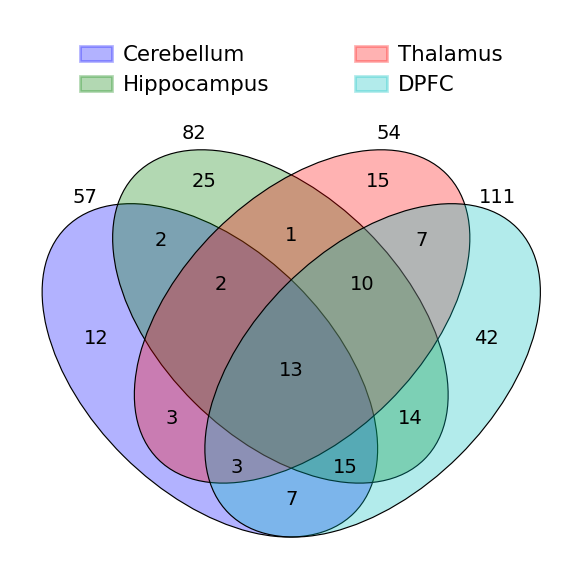

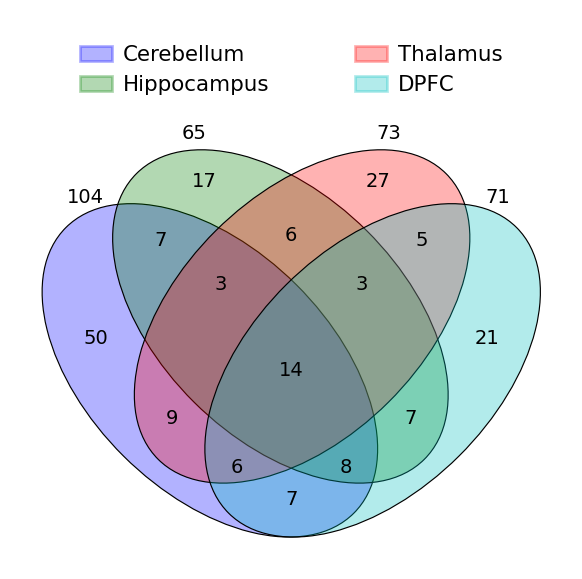

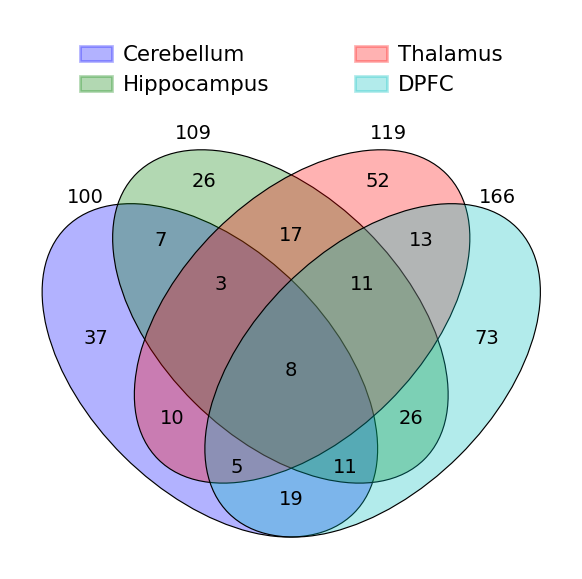

In [ ]:
from venny4py.venny4py import venny4py

regions = ['Cerebellum', 'Hippocampus', 'Thalamus', 'DPFC']
trends = ['increasing', 'decreasing', 'other']

for trend in trends:
    venn_sets = {
        region: set(parkinson_gene_list_up[region].loc[parkinson_gene_list_up[region]['Trend'] == trend, 'Gene'].unique())
        for region in regions
    }
    print(f"Venn diagram for Down-regulated Parkinson's genes - {trend} trend")
    venny4py(sets=venn_sets)


Venn diagram for Up-regulated Parkinson's genes across regions (ignoring trend)
Venn diagram for Down-regulated Parkinson's genes across regions (ignoring trend)


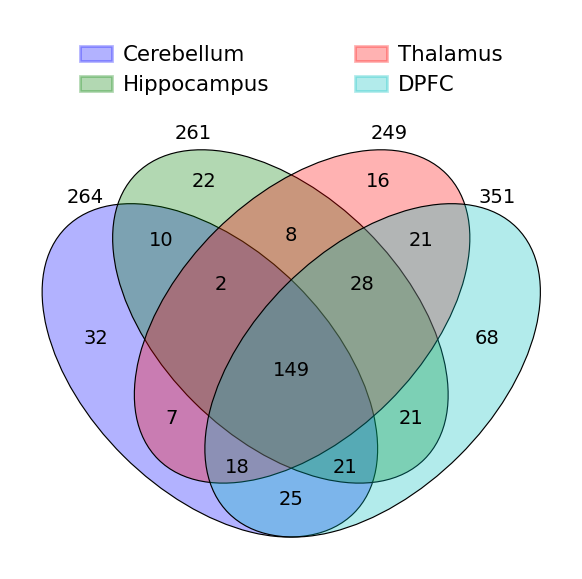

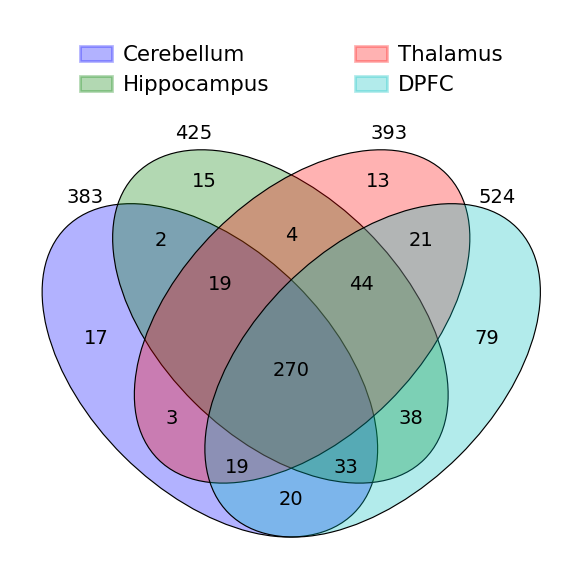

In [ ]:
from venny4py.venny4py import venny4py

regions = ['Cerebellum', 'Hippocampus', 'Thalamus', 'DPFC']

venn_sets_up = {
    region: set(parkinson_gene_list_up[region]['Accession'].unique())
    for region in regions
}

print("Venn diagram for Up-regulated Parkinson's genes across regions (ignoring trend)")
venny4py(sets=venn_sets_up)


venn_sets_down = {
    region: set(parkinson_gene_list_down[region]['Accession'].unique())
    for region in regions
}

print("Venn diagram for Down-regulated Parkinson's genes across regions (ignoring trend)")
venny4py(sets=venn_sets_down)
'''
from venny4py.venny4py import venny4py

sets = {
    'Set2': set(ad_up),
    'Set3': set(ad_down),
}
venny4py(sets=sets)
'''

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload file
uploaded = files.upload()

# Read with proper encoding
file_name = next(iter(uploaded))
try:
    ad_429 = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin1')  # or 'ISO-8859-1'
    print(f"Successfully loaded {file_name}")
    print("Data preview:")
    display(ad_429.head())
except UnicodeDecodeError:
    print("""
    Still encountering errors? Try:
    1. Different encodings: 'utf-16', 'cp1252'
    2. Check CSV delimiters
    3. Verify file integrity
    """)


Saving AD-429_plasma_proteins.csv to AD-429_plasma_proteins (2).csv
Successfully loaded AD-429_plasma_proteins (2).csv
Data preview:


,Down-regulated in AD / early AD / MCI,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Up-regulated in AD / early AD / MCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Protein_name,Gene_name,Uniprot_ID,Olink_ID,Full_protein_name,Biological_category_1,Biological_category_2,AD_Estimate,AD_FDR_P_value,Literature_1,Literature_2,Literature_3,Literature_4,Literature_5,Literature_6
3,LYN,LYN,P07948,OID00715,Tyrosine-protein kinase Lyn (EC 2.7.10.2) (Lck...,Oncology,NaN,-1.481218233,2.82E-21,"Sattlecker, Martina, et al. ""Alzheimer's disea...",NaN,NaN,NaN,NaN,NaN
4,CD69,CD69,Q07108,OID01467,Early activation antigen CD69 (Activation indu...,Development,NaN,-1.531072132,5.22E-21,"Stieler, Jens T., et al. ""Impairment of mitoge...",NaN,NaN,NaN,NaN,NaN


In [ ]:
ad_429.columns = ad_429.iloc[2]
ad_429.head()

2,Protein_name,Gene_name,Uniprot_ID,Olink_ID,Full_protein_name,Biological_category_1,Biological_category_2,AD_Estimate,AD_FDR_P_value,Literature_1,Literature_2,Literature_3,Literature_4,Literature_5,Literature_6
0,Up-regulated in AD / early AD / MCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Protein_name,Gene_name,Uniprot_ID,Olink_ID,Full_protein_name,Biological_category_1,Biological_category_2,AD_Estimate,AD_FDR_P_value,Literature_1,Literature_2,Literature_3,Literature_4,Literature_5,Literature_6
3,LYN,LYN,P07948,OID00715,Tyrosine-protein kinase Lyn (EC 2.7.10.2) (Lck...,Oncology,NaN,-1.481218233,2.82E-21,"Sattlecker, Martina, et al. ""Alzheimer's disea...",NaN,NaN,NaN,NaN,NaN
4,CD69,CD69,Q07108,OID01467,Early activation antigen CD69 (Activation indu...,Development,NaN,-1.531072132,5.22E-21,"Stieler, Jens T., et al. ""Impairment of mitoge...",NaN,NaN,NaN,NaN,NaN


In [ ]:
ad_429 = ad_429.drop([0, 1, 2])
ad_429.head()

2,Protein_name,Gene_name,Uniprot_ID,Olink_ID,Full_protein_name,Biological_category_1,Biological_category_2,AD_Estimate,AD_FDR_P_value,Literature_1,Literature_2,Literature_3,Literature_4,Literature_5,Literature_6
3,LYN,LYN,P07948,OID00715,Tyrosine-protein kinase Lyn (EC 2.7.10.2) (Lck...,Oncology,NaN,-1.481218233,2.82E-21,"Sattlecker, Martina, et al. ""Alzheimer's disea...",NaN,NaN,NaN,NaN,NaN
4,CD69,CD69,Q07108,OID01467,Early activation antigen CD69 (Activation indu...,Development,NaN,-1.531072132,5.22E-21,"Stieler, Jens T., et al. ""Impairment of mitoge...",NaN,NaN,NaN,NaN,NaN
5,EIF4G1,EIF4G1,Q04637,OID00976,Eukaryotic translation initiation factor 4 gam...,Immune response,NaN,-1.395597264,5.44E-21,NaN,NaN,NaN,NaN,NaN,NaN
6,PLXNA4,PLXNA4,Q9HCM2,OID00982,Plexin-A4,Immune response,NaN,-1.476181419,1.10E-20,NaN,NaN,NaN,NaN,NaN,NaN
7,SNAP29,SNAP29,O95721,OID01439,Synaptosomal-associated protein 29 (SNAP-29) (...,Development,NaN,-1.39664952,3.61E-20,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ad_429 = ad_429.reset_index(drop=True)
ad_429.head()

2,Protein_name,Gene_name,Uniprot_ID,Olink_ID,Full_protein_name,Biological_category_1,Biological_category_2,AD_Estimate,AD_FDR_P_value,Literature_1,Literature_2,Literature_3,Literature_4,Literature_5,Literature_6
0,LYN,LYN,P07948,OID00715,Tyrosine-protein kinase Lyn (EC 2.7.10.2) (Lck...,Oncology,NaN,-1.481218233,2.82E-21,"Sattlecker, Martina, et al. ""Alzheimer's disea...",NaN,NaN,NaN,NaN,NaN
1,CD69,CD69,Q07108,OID01467,Early activation antigen CD69 (Activation indu...,Development,NaN,-1.531072132,5.22E-21,"Stieler, Jens T., et al. ""Impairment of mitoge...",NaN,NaN,NaN,NaN,NaN
2,EIF4G1,EIF4G1,Q04637,OID00976,Eukaryotic translation initiation factor 4 gam...,Immune response,NaN,-1.395597264,5.44E-21,NaN,NaN,NaN,NaN,NaN,NaN
3,PLXNA4,PLXNA4,Q9HCM2,OID00982,Plexin-A4,Immune response,NaN,-1.476181419,1.10E-20,NaN,NaN,NaN,NaN,NaN,NaN
4,SNAP29,SNAP29,O95721,OID01439,Synaptosomal-associated protein 29 (SNAP-29) (...,Development,NaN,-1.39664952,3.61E-20,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ad_429['regulation'] = pd.cut(
    ad_429['AD_Estimate'].astype(float),
    bins=[-float('inf'), 0, float('inf')],
    labels=['DOWN', 'UP']
)
ad_429[['AD_Estimate', 'regulation']].head()

2,AD_Estimate,regulation
0,-1.481218233,DOWN
1,-1.531072132,DOWN
2,-1.395597264,DOWN
3,-1.476181419,DOWN
4,-1.39664952,DOWN


In [ ]:
ad_total = ad_429['Gene_name'].tolist()
ad_up = ad_429[ad_429['regulation'] == 'UP']['Gene_name'].tolist()
ad_down = ad_429[ad_429['regulation'] == 'DOWN']['Gene_name'].tolist()

print(len(ad_total))
print(len(ad_up))
print(len(ad_down))

429
61
368


In [ ]:
stage_columns = ['22week_Avg', '26week_Avg', '1year_Avg', '2year_Avg', '4year_Avg', '22year_Avg', '35year_Avg', '47year_Avg', '82year_Avg']
brain_regions = {'Cerebellum': cerebellum_df,
                 'Hippocampus': hippocampus_df,
                 'Thalamus': thalamus_df,
                 'DPFC': dpfc_df}

gene_list = ad_down

ad_genes_dataset = []
for region, df in trend_dfs.items():
    ad_genes_dataset += df[df['Gene'].isin(gene_list)]['Gene'].tolist()
ad_genes_dataset = list(set(ad_genes_dataset))  # Unique accessions for PD genes
print(ad_genes_dataset)
print(len(ad_genes_dataset))

#14/61, 226/368, 240/429

['AHCY', 'GFER', 'CASP3', 'TPP1', 'PFKM', 'TIGAR', 'WASF1', 'BLMH', 'AIFM1', 'PAG1', 'PDP1', 'PVALB', 'NAA10', 'TDRKH', 'FES', 'DAB2', 'SOD1', 'STX16', 'PPP1R9B', 'PRDX6', 'BCR', 'SIRT5', 'EIF4G1', 'YES1', 'ABL1', 'LYN', 'PREB', 'MAP2K6', 'HNMT', 'CRADD', 'ALDH1A1', 'PEBP1', 'MAGED1', 'MIF', 'PXN', 'VPS53', 'FGF2', 'LAMA4', 'CDC27', 'NOMO1', 'AIMP1', 'PRTFDC1', 'STX8', 'RRM2B', 'BGN', 'STK4', 'FUT8', 'LTA4H', 'PPP3R1', 'NUCB2', 'TBCB', 'CNTN1', 'IQGAP2', 'HMOX2', 'HTRA2', 'CBL', 'TANK', 'RPS6KB1', 'PARK7', 'IMPA1', 'ATP6V1F', 'CD63', 'LACTB2', 'DFFA', 'TRAF2', 'ANXA4', 'STX6', 'ANXA11', 'ITGB2', 'PAK4', 'ROBO2', 'CRKL', 'CBLN4', 'CAMKK1', 'TNR', 'FKBP1B', 'FKBP5', 'NUB1', 'SNAP23', 'LRP1', 'MGMT', 'STAMBP', 'PSME1', 'CSNK1D', 'PTPRJ', 'INPP1', 'METAP1', 'ARHGAP1', 'TOP2B', 'BRK1', 'MASP1', 'INPPL1', 'VAT1', 'FAS', 'YTHDF3', 'PRKRA', 'SOD2', 'MANF', 'DIABLO', 'ARHGEF12', 'GAMT', 'CPM', 'ITGB1BP1', 'PAM', 'COMT', 'FKBP7', 'PPM1B', 'IGSF3', 'CD2AP', 'FKBP4', 'SCAMP3', 'EIF5A', 'ENAH', 'OM

In [ ]:
gene_list = ad_down

region_increasing = {}
region_decreasing = {}
region_other = {}

for region_name, region_df in trend_dfs.items():
    filtered_genes = region_df[
        (region_df['Gene'].isin(gene_list)) &
        (region_df['Trend'] == 'increasing')
    ]['Gene'].unique().tolist()

    region_increasing[region_name] = filtered_genes

for region_name, region_df in trend_dfs.items():
    filtered_genes = region_df[
        (region_df['Gene'].isin(gene_list)) &
        (region_df['Trend'] == 'decreasing')
    ]['Gene'].unique().tolist()
    region_decreasing[region_name] = filtered_genes

for region_name, region_df in trend_dfs.items():
    filtered_genes = region_df[
        (region_df['Gene'].isin(gene_list)) &
        (region_df['Trend'] == 'other')
    ]['Gene'].unique().tolist()
    region_other[region_name] = filtered_genes

print("Increasing genes in gene_list by brain region:")
for region, genes in region_increasing.items():
    print(f"\n**{region}**:{len(genes)}")
    if genes:
        print(f"  - {', '.join(genes)} ({len(genes)} genes)")
    else:
        print("  - No increasing genes found")

print("\nDECREASING TREND GENES IN gene_list:")
for region, genes in region_decreasing.items():
    print(f"\n{region}:{len(genes)}")
    print(f"  {genes} ({len(genes)} genes)" if genes else "  No decreasing genes")

print("\n\nOTHER TREND GENES IN gene_list:")
for region, genes in region_other.items():
    print(f"\n{region}:{len(genes)}")
    print(f"  {genes} ({len(genes)} genes)" if genes else "  No other trend genes")


unique_genes = set()
for genes in region_decreasing.values():
    unique_genes.update(genes)  # Add all genes from each region

unique_genes = sorted(list(unique_genes))

print(f"Unique increasing genes across all regions ({len(unique_genes)} total):")
print(unique_genes)



Increasing genes in gene_list by brain region:

**Cerebellum**:35
  - ALDH1A1, ENO2, PFKM, PEBP1, TNR, PARK7, PSIP1, PRDX6, SIRT2, QDPR, AKR1B1, SOD1, LYN, ATP6V1D, SERPINB6, ANXA11, IMPA1, DIABLO, SCAMP3, OMG, ACAA1, STXBP3, BAG6, HMOX2, BGN, TDRKH, VPS53, FHIT, CAMKK1, SCLY, HTRA2, DPP7, ITGB2, FGF2, CBL (35 genes)

**Hippocampus**:47
  - ANXA4, GLO1, STXBP3, ABHD14B, AIF1, BAG6, TNR, PARK7, SNAP23, GAMT, QDPR, ALDH1A1, IMPA1, ANXA11, FKBP5, PDP1, PFKM, CAMKK1, EGFR, SDC4, CD63, LAP3, LGALS8, CTSD, DECR1, FES, INPP1, MIF, PEBP1, SOD1, THOP1, WASF1, AIFM1, ARHGAP1, PRDX6, NAMPT, S100A11, STAMBP, TPP1, ENO2, DPP7, MAEA, CPM, SOD2, ATP6V1D, BCR, PAM (47 genes)

**Thalamus**:43
  - PFKM, TNR, ACTN4, PRDX1, PARK7, PEBP1, LAP3, QDPR, SOD1, HSPB1, CTSD, SOD2, PRDX6, IMPA1, AKR1B1, OMG, PFDN2, STXBP3, ANXA1, ATP6V1D, LTA4H, ANXA11, PPP3R1, MIF, ITGB1, HNMT, PSME1, PAM, GLO1, ATP6V1F, TPP1, ABHD14B, ABL1, PMVK, PDP1, S100A11, SPRY2, CAMKK1, SERPINB6, ITGB2, FGF2, PECAM1, HCLS1 (43 genes)

**D